# Vizualize Means of Contexts for Different Models
* For all of the metrics
* apply 3 different styles

In [1]:
import os
os.chdir('./data')

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob
from tabulate import tabulate
from IPython.display import Latex, display_html, display, HTML

## Load Results for all Metrics

In [3]:
SIM = pd.read_csv('scores_mean_contexts_' + 'SIM' + '.csv')
NSS = pd.read_csv('scores_mean_contexts_' + 'NSS' + '.csv')
AUC = pd.read_csv('scores_mean_contexts_' + 'AUC' + '.csv')
IG = pd.read_csv('scores_mean_contexts_' + 'IG' + '.csv')

#### Set Models as Index

In [4]:
SIM.rename(columns={'Unnamed: 0':'models'}, inplace=True)
SIM.set_index('models', inplace=True)

NSS.rename(columns={'Unnamed: 0':'models'}, inplace=True)
NSS.set_index('models', inplace=True)

AUC.rename(columns={'Unnamed: 0':'models'}, inplace=True)
AUC.set_index('models', inplace=True)

IG.rename(columns={'Unnamed: 0':'models'}, inplace=True)
IG.set_index('models', inplace=True)

In [5]:
SIM

,0.0,0.3,0.5,0.7
models,,,,
aim,0.514880,0.520331,0.526648,0.533162
cas,0.509075,0.513087,0.517098,0.524176
covsal,0.519326,0.530241,0.538795,0.543626
gbvs,0.567043,0.570592,0.574965,0.581561
icf,0.523715,0.529880,0.534590,0.538743
ik,0.473959,0.479798,0.485900,0.493749
sun,0.417201,0.421388,0.427284,0.436159


## Vizualization

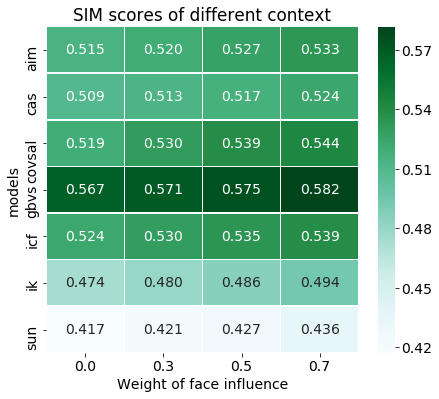

In [6]:
matplotlib.rcParams.update({'font.size': 14})

f, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(SIM, annot=True, linewidths=.5, ax=ax,fmt='.3f', cmap='BuGn');
plt.xlabel('Weight of face influence')
plt.title('{} scores of different context'.format('SIM'));

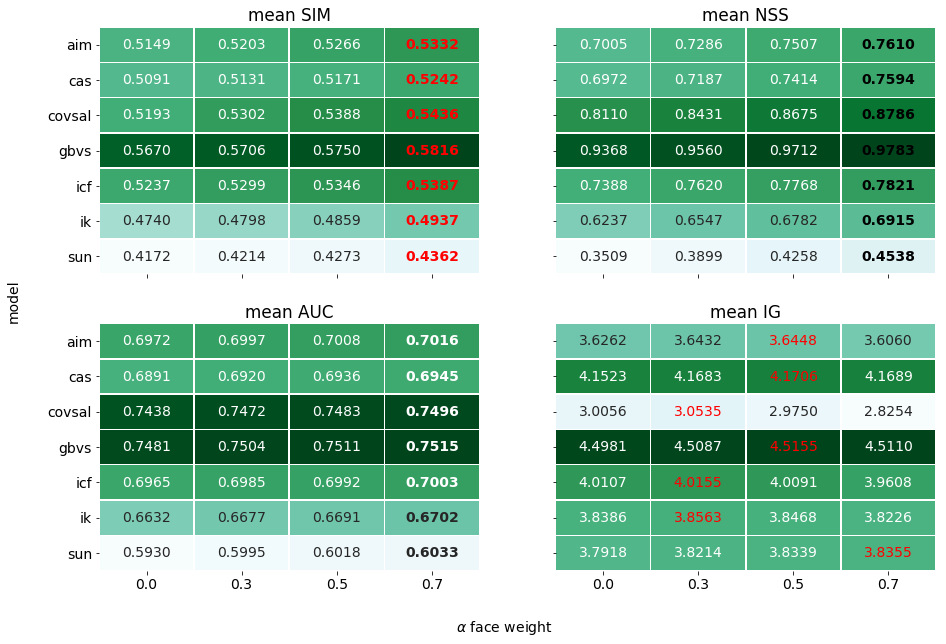

In [7]:
matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(2, 2, figsize=(15,10), sharex=True, sharey=True)

im = sns.heatmap(SIM, annot=True, linewidths=.5, ax=ax[0][0], cbar=False, cmap='BuGn', fmt='.4f');
sns.heatmap(NSS, annot=True, linewidths=.5, ax=ax[0][1], cbar=False, cmap='BuGn', fmt='.4f');
sns.heatmap(AUC, annot=True, linewidths=.5, ax=ax[1][0], cbar=False, cmap='BuGn', fmt='.4f');
sns.heatmap(IG, annot=True, linewidths=.5, ax=ax[1][1], cbar=False, cmap='BuGn', fmt='.4f');

mappable = im.get_children()[0]
# plt.colorbar(mappable, ax = ax);

ax[0][0].set_title('mean {}'.format('SIM'))
ax[0][1].set_title('mean {}'.format('NSS'))
ax[1][0].set_title('mean {}'.format('AUC'))
ax[1][1].set_title('mean {}'.format('IG'))

ax[0][0].set_ylabel('')
ax[0][1].set_ylabel('')
ax[1][0].set_ylabel('')
ax[1][1].set_ylabel('')

# SIM
for text in ax[0][0].texts:
    if (   text.get_text() == '0.5332' 
        or text.get_text() == '0.5242' 
        or text.get_text() == '0.5436'
        or text.get_text() == '0.5816'
        or text.get_text() == '0.5387'
        or text.get_text() == '0.4937'
        or text.get_text() == '0.4362'):
        text.set_weight('bold')
        text.set_color('red')

# NSS
for text in ax[0][1].texts:
    if (   text.get_text() == '0.7610' 
        or text.get_text() == '0.7594' 
        or text.get_text() == '0.8786'
        or text.get_text() == '0.9783'
        or text.get_text() == '0.7821'
        or text.get_text() == '0.6915'
        or text.get_text() == '0.4538'):
        text.set_weight('bold')
        text.set_color('black')
        
# AUC
for text in ax[1][0].texts:
    if (   text.get_text() == '0.7016' 
        or text.get_text() == '0.6945' 
        or text.get_text() == '0.7496'
        or text.get_text() == '0.7515'
        or text.get_text() == '0.7003'
        or text.get_text() == '0.6702'
        or text.get_text() == '0.6033'):
        text.set_weight('bold')
#         text.set_color('red')

        
# IG
for text in ax[1][1].texts:
    if (   text.get_text() == '3.6448' 
        or text.get_text() == '4.1706' 
        or text.get_text() == '3.0535'
        or text.get_text() == '4.5155'
        or text.get_text() == '4.0155'
        or text.get_text() == '3.8563'
        or text.get_text() == '3.8355'):
#         text.set_weight('bold')
        text.set_color('red')
        
fig.text(0.04, 0.5, 'model', va='center', rotation='vertical')
fig.text(0.5, 0.04, r'$\alpha$ face weight', ha='center');
plt.savefig('../../results/plots/mean_of_contexts.png', bbox_inches='tight', pad_inches=0)

## Tables and PD vizualization

In [8]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['color: red' if v else '' for v in is_max]

In [9]:
sim_styler = SIM.style.apply(highlight_max, axis=1).set_table_attributes("style='display:inline'").set_caption('SIM')
nss_styler = NSS.style.apply(highlight_max, axis=1).set_table_attributes("style='display:inline'").set_caption('NSS')
ig_styler  = IG.style.apply(highlight_max, axis=1).set_table_attributes("style='display:inline'").set_caption('IG')
auc_styler = AUC.style.apply(highlight_max, axis=1).set_table_attributes("style='display:inline'").set_caption('AUC')

display_html(
    nss_styler._repr_html_() +
    sim_styler._repr_html_() +
    auc_styler._repr_html_()  +
    ig_styler._repr_html_(), raw=True)

,0.0,0.3,0.5,0.7
models,,,,
aim,0.700463,0.728636,0.750676,0.761014
cas,0.697208,0.718745,0.74142,0.75943
covsal,0.810962,0.843136,0.867493,0.878562
gbvs,0.93677,0.956026,0.971219,0.978307
icf,0.738762,0.762025,0.7768,0.782087
ik,0.623667,0.654673,0.678249,0.691531
sun,0.350892,0.389937,0.425804,0.453816
,0.0,0.3,0.5,0.7
models,,,,


In [10]:
SIM.style.apply(highlight_max, axis=1)

,0.0,0.3,0.5,0.7
models,,,,
aim,0.51488,0.520331,0.526648,0.533162
cas,0.509075,0.513087,0.517098,0.524176
covsal,0.519326,0.530241,0.538795,0.543626
gbvs,0.567043,0.570592,0.574965,0.581561
icf,0.523715,0.52988,0.53459,0.538743
ik,0.473959,0.479798,0.4859,0.493749
sun,0.417201,0.421388,0.427284,0.436159


In [11]:
NSS.style.apply(highlight_max, axis=1)

,0.0,0.3,0.5,0.7
models,,,,
aim,0.700463,0.728636,0.750676,0.761014
cas,0.697208,0.718745,0.74142,0.75943
covsal,0.810962,0.843136,0.867493,0.878562
gbvs,0.93677,0.956026,0.971219,0.978307
icf,0.738762,0.762025,0.7768,0.782087
ik,0.623667,0.654673,0.678249,0.691531
sun,0.350892,0.389937,0.425804,0.453816


In [12]:
AUC.style.apply(highlight_max, axis=1)

,0.0,0.3,0.5,0.7
models,,,,
aim,0.697163,0.699687,0.700793,0.701641
cas,0.689103,0.692001,0.693586,0.694483
covsal,0.743779,0.747156,0.748292,0.749576
gbvs,0.74813,0.750355,0.751127,0.75151
icf,0.696548,0.698487,0.699239,0.700332
ik,0.663201,0.667707,0.669076,0.670186
sun,0.592978,0.599509,0.601827,0.603279


In [13]:
IG.style.apply(highlight_max, axis=1)

,0.0,0.3,0.5,0.7
models,,,,
aim,3.62616,3.64318,3.64476,3.60599
cas,4.15231,4.16834,4.17058,4.16894
covsal,3.0056,3.05348,2.97502,2.82543
gbvs,4.4981,4.5087,4.51551,4.51099
icf,4.01067,4.01554,4.00913,3.96077
ik,3.83863,3.85628,3.84677,3.82259
sun,3.79181,3.82141,3.83393,3.8355


## Tables

In [14]:
print(tabulate(SIM, tablefmt="pipe", headers="keys"))

| models   |      0.0 |      0.3 |      0.5 |      0.7 |
|:---------|---------:|---------:|---------:|---------:|
| aim      | 0.51488  | 0.520331 | 0.526648 | 0.533162 |
| cas      | 0.509075 | 0.513087 | 0.517098 | 0.524176 |
| covsal   | 0.519326 | 0.530241 | 0.538795 | 0.543626 |
| gbvs     | 0.567043 | 0.570592 | 0.574965 | 0.581561 |
| icf      | 0.523715 | 0.52988  | 0.53459  | 0.538743 |
| ik       | 0.473959 | 0.479798 | 0.4859   | 0.493749 |
| sun      | 0.417201 | 0.421388 | 0.427284 | 0.436159 |
